In [2]:
import gym 
import random
import numpy as np

In [3]:
env = gym.make('MsPacman-ram-v0')

In [4]:
height = env.observation_space.shape[0]

In [5]:
actions = env.action_space.n

In [6]:
env.unwrapped.get_action_meanings()

['NOOP',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'DOWNRIGHT',
 'DOWNLEFT']

Episode:2 Score:100.0


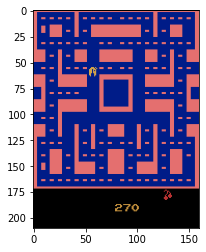

In [7]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
episodes = 2
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        img.set_data(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = random.choice([0,1,2,3,4,5])
        n_state, reward, done, info = env.step(action)
        score+=reward
        env.step(action)
        env.step(action)
    print('Episode:{} Score:{}'.format(episode, score))
        
env.close()



In [8]:
#import numpy as np
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten, Convolution2D, Activation
#from tensorflow.keras.optimizers import Adam

In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, Activation
from keras.optimizers import Adam

In [10]:
def build_model():
    model = Sequential()    
    model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(env.action_space.n))
    model.add(Activation('linear'))
    print(model.summary())
    return model

In [11]:
model = build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0

In [12]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
import tensorflow as tf

In [13]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [14]:
#def build_agent(model, actions):
#    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
#    memory = SequentialMemory(limit=1000, window_length=3)
#    dqn = DQNAgent(model=model, memory=memory, policy=policy,
#                  enable_dueling_network=True, dueling_type='avg', 
#                   nb_actions=actions, nb_steps_warmup=10000
#                  )
#    return dqn

In [15]:
dqn = build_agent(model, env.action_space.n)

In [16]:
dqn.compile(Adam(learning_rate=1e-4))

AttributeError: 'Sequential' object has no attribute '_compile_time_distribution_strategy'

In [17]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

RuntimeError: Physical devices cannot be modified after being initialized